In [1]:
# Import libraries for machine leraning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from utils import split_data
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm



### Supervised machine learning
##### 1) Linear Regression
##### 2) Random Forest
##### 3) Ridge/Lasso Regression
##### 4) Support vector machine
##### 5) KNN Classification


#### Start with Linear Regression

In [2]:
# Load the data
penguin_data = pd.read_csv('penguins.csv')

# Replace the missing values with NaN
penguine_new = penguin_data.replace(r'^\s*$', np.nan, regex=True)

# Drop the rows with missing values
penguine_clean = penguine_new.dropna(subset=["sex"])  

# Print the results
penguine_clean.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
penguine_clean.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [4]:
# Split data into train test data
features = penguine_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]  # Features
response = penguine_clean['body_mass_g']  # Response   

# Split the data into train and test data
X_train, X_test, y_train, y_test = split_data(features, response, test_size=0.2, random_state=42)   # Split data into train and test data

# Create a linear regression model 

#### Ordinary Least Square Regression 

model coefficients: [ 3.85768347 10.05813347 50.24725463]
model intercept: -6227.688410615803


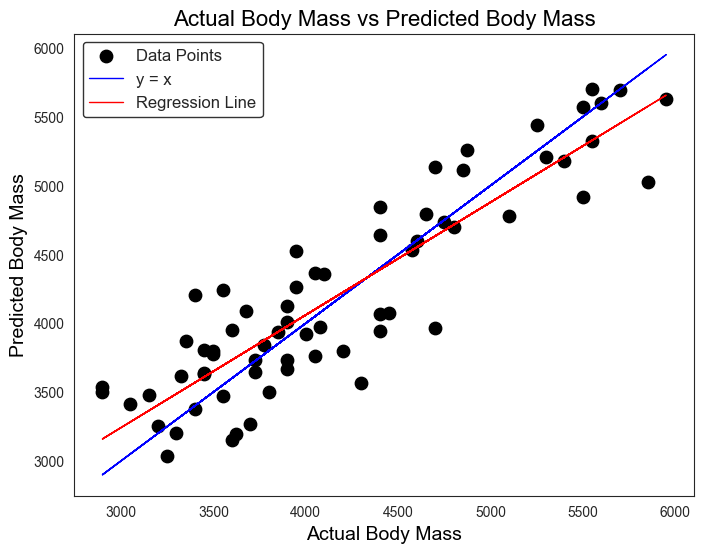

In [5]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# print the model coefficients
print("model coefficients:", model.coef_)
print("model intercept:", model.intercept_)

# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(8, 6))
sns.set_style("white")

m, n = np.polyfit(y_test, y_pred, 1)

plt.scatter(y_test, y_pred, color='black', s=80, label='Data Points')
plt.plot(y_test,y_test, color='blue', linewidth=1, label='y = x')
plt.plot(y_test, m*y_test + n, color='red', linewidth=1, label="Regression Line")

plt.xlabel("Actual Body Mass", fontsize=14, color = 'black')
plt.ylabel("Predicted Body Mass", fontsize=14, color = 'black')

plt.title("Actual Body Mass vs Predicted Body Mass", fontsize=16, color = 'black')
plt.legend(edgecolor='black', fontsize=12, frameon=True)
plt.show()



#### Use Statsmodels Approach

In [6]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            body_mass_g   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              7505.
Date:                Wed, 12 Feb 2025   Prob (F-statistic):                   2.09e-254
Time:                        10:44:25   Log-Likelihood:                         -2009.0
No. Observations:                 266   AIC:                                      4024.
Df Residuals:                     263   BIC:                                      4035.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

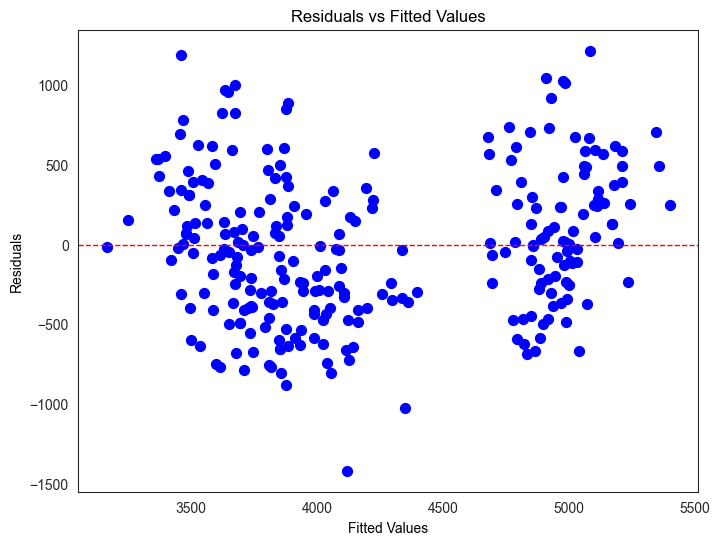

In [7]:
# Model Residuals
model_residuals = model.resid

# plot the residuals
sns.set_style("white")

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model_residuals, color='blue', s=50)   
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values", color= 'black')
plt.xlabel("Fitted Values", color= 'black')
plt.ylabel("Residuals", color= 'black')
plt.show()

#### Ridge Regression 

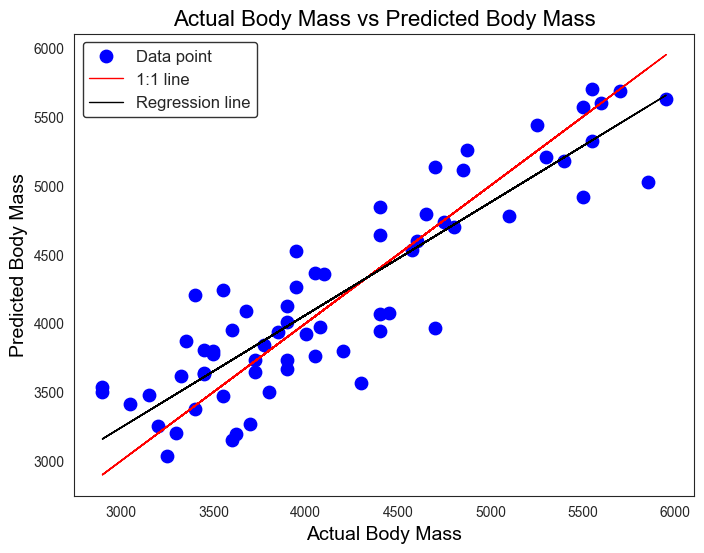

In [8]:
from sklearn.linear_model import Ridge  
from sklearn.metrics import mean_squared_error

# Create a Ridge regression model   
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Plot the results
plt.figure(figsize=(8, 6))
sns.set_style("white")

m,n = np.polyfit(y_test, y_pred, 1)

plt.scatter(y_test, y_pred, color='blue', s=80, label="Data point")
plt.plot(y_test, y_test, color='red', linewidth=1, label="1:1 line")
plt.plot(y_test, m*y_test + n, color='black', linewidth=1, label="Regression line")

plt.xlabel("Actual Body Mass", fontsize=14, color = 'black')
plt.ylabel("Predicted Body Mass", fontsize=14, color = 'black')

plt.title("Actual Body Mass vs Predicted Body Mass", fontsize=16, color = 'black')
plt.legend(edgecolor = 'black', frameon=True, fontsize=12)

plt.show()


In [9]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Ridge coefficients:", model.coef_)

Mean Squared Error: 127204.37997248201
Ridge coefficients: [ 3.86260396 10.03392225 50.24297761]


#### Choosing the best lambda for ridge regression


In [10]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# Create a Ridge regression model with cross-validation
model = RidgeCV(alphas=[0.1, 1.0, 10.0], store_cv_values=True) 

# add standardization to the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("Ridge coefficients:", model.coef_)
print("Best alpha:", model.alpha_)

Mean Squared Error: 127436.62539831283
Ridge coefficients: [ 24.88780497  16.43816015 690.57202069]
Best alpha: 1.0


c:\Users\Owner\master_data\master_data_analysis\myenv\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


#### Lasso Regression

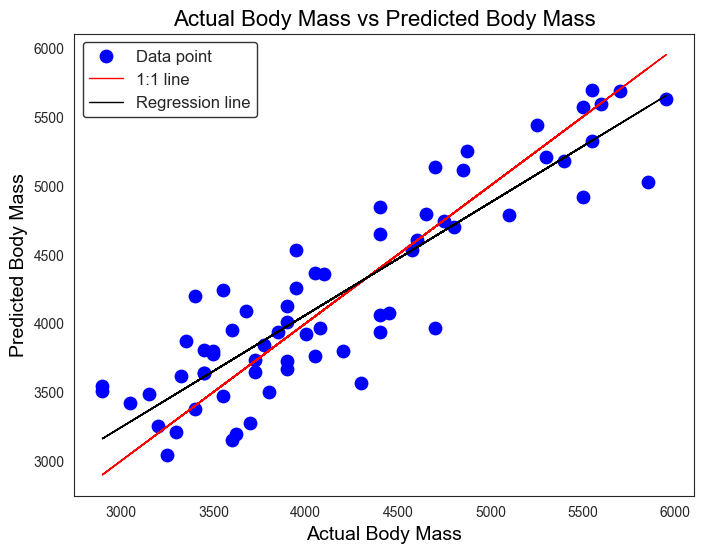

Mean Squared Error: 127405.34760532384
R2 Score: 0.7977506062245904
Mean Absolute Error: 289.8552094727622
Lasso coefficients: [ 21.00233154  17.40509208 695.34487418]
Lasso intercept: 4214.755639097744


In [11]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a Lasso regression model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Lasso regression model
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions  
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(8, 6))
sns.set_style("white")

m,n = np.polyfit(y_test, y_pred, 1)

plt.scatter(y_test, y_pred, color='blue', s=80, label="Data point")
plt.plot(y_test, y_test, color='red', linewidth=1, label="1:1 line")
plt.plot(y_test, m*y_test + n, color='black', linewidth=1, label="Regression line")

plt.xlabel("Actual Body Mass", fontsize=14, color = 'black')
plt.ylabel("Predicted Body Mass", fontsize=14, color = 'black')

plt.title("Actual Body Mass vs Predicted Body Mass", fontsize=16, color = 'black')
plt.legend(edgecolor = 'black', frameon=True, fontsize=12)

plt.show()


# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
mean_absolute_error = mean_absolute_error(y_test, y_pred)   

# Print the results
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score)
print("Mean Absolute Error:", mean_absolute_error)

print("Lasso coefficients:", model.coef_)
print("Lasso intercept:", model.intercept_)



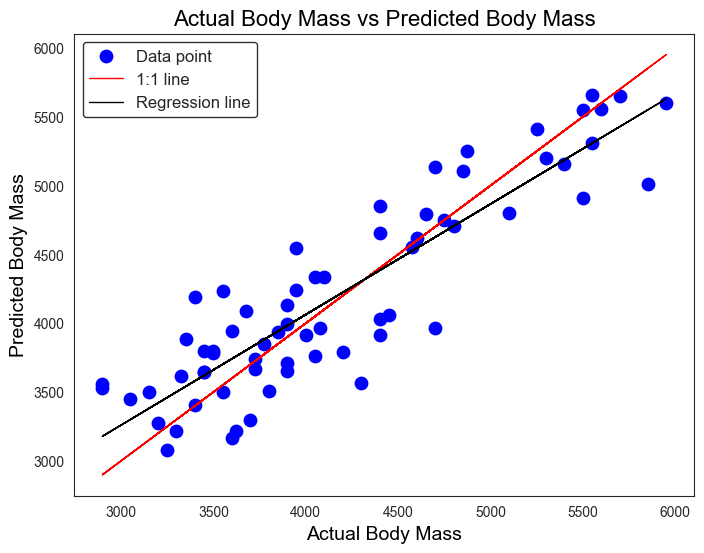

Mean Squared Error: 129134.35
R2 Score: 0.7950059067358373
Mean Absolute Error: 291.17338361498133
Lasso coefficients: [ 21.02119285   0.         676.16248123]
Lasso intercept: 4214.755639097744
Best alpha: 10.0


In [12]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error   

# Create a Lasso regression model with cross-validation
model = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)  
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(8, 6))
sns.set_style("white")

m,n = np.polyfit(y_test, y_pred, 1)

plt.scatter(y_test, y_pred, color='blue', s=80, label="Data point")
plt.plot(y_test, y_test, color='red', linewidth=1, label="1:1 line")
plt.plot(y_test, m*y_test + n, color='black', linewidth=1, label="Regression line")

plt.xlabel("Actual Body Mass", fontsize=14, color = 'black')
plt.ylabel("Predicted Body Mass", fontsize=14, color = 'black')

plt.title("Actual Body Mass vs Predicted Body Mass", fontsize=16, color = 'black')
plt.legend(edgecolor = 'black', frameon=True, fontsize=12)

plt.show()


# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
mean_absolute_error = mean_absolute_error(y_test, y_pred)   

# Print the results
print("Mean Squared Error:", f"{mse:.2f}")  
print("R2 Score:", r2_score)
print("Mean Absolute Error:", mean_absolute_error)

print("Lasso coefficients:", model.coef_)
print("Lasso intercept:", model.intercept_)
print("Best alpha:", model.alpha_)



#### Logistic Regression


In [13]:
# Import libraries for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


# Load the data
X_features = penguine_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', "body_mass_g"]]  # Features
y_response = penguine_clean["species"]  # Response

# label encoder
le = LabelEncoder()
y_response = le.fit_transform(y_response)


# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_response, test_size=0.2, random_state=42, stratify=y_response)

# Create a Lasso regression model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(multi_class= "multinomial", solver="lbfgs", max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:") 
print(classification_report(y_test, y_pred))



Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



c:\Users\Owner\master_data\master_data_analysis\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


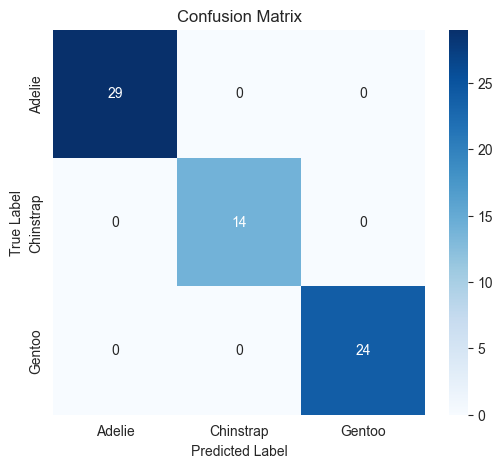

In [14]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [15]:
penguine_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [16]:
penguine_clean.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

#### Logistic Regression - Penguine Sex column

In [17]:
# Import libraries for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


# Load the data
X_features = penguine_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', "body_mass_g"]]  # Features
y_response = penguine_clean["sex"]  # Response

le = LabelEncoder()
y_response = le.fit_transform(y_response)

#print(y_response)

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_response, test_size=0.2, random_state=42, stratify=y_response)

# Create a Lasso regression model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a logistic regression model
model = LogisticRegression(solver="lbfgs", max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



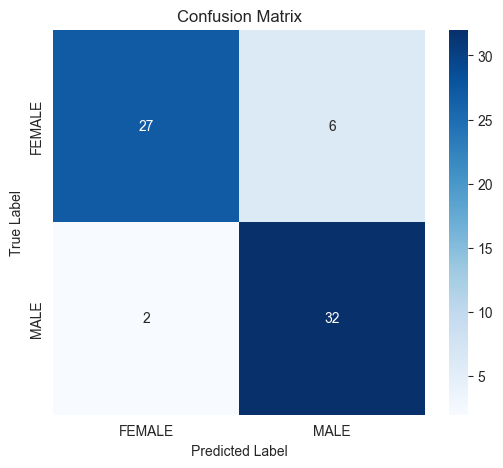

In [18]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### K Nearest Neighbor Algorithm

In [19]:
# import k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
X_features = penguine_clean[['bill_length_mm', 'bill_depth_mm']]  # Features
y_response = penguine_clean["sex"]  # Response

# Encode the response variable
le = LabelEncoder()
y_response = le.fit_transform(y_response)

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_response, test_size=0.2, random_state=42, stratify=y_response)

# Create a Lasso regression model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)  # p=2 is equivalent to using the Euclidean distance
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
#print("Classification Report:") 
#print(classification_report(y_test, y_pred))


Accuracy: 0.835820895522388


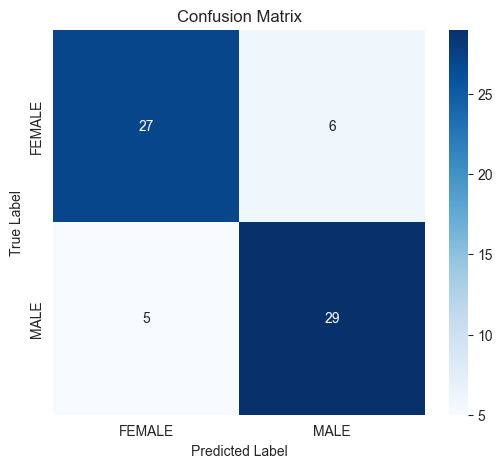

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_16196\1050915162.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.Paired, label='Test Data')


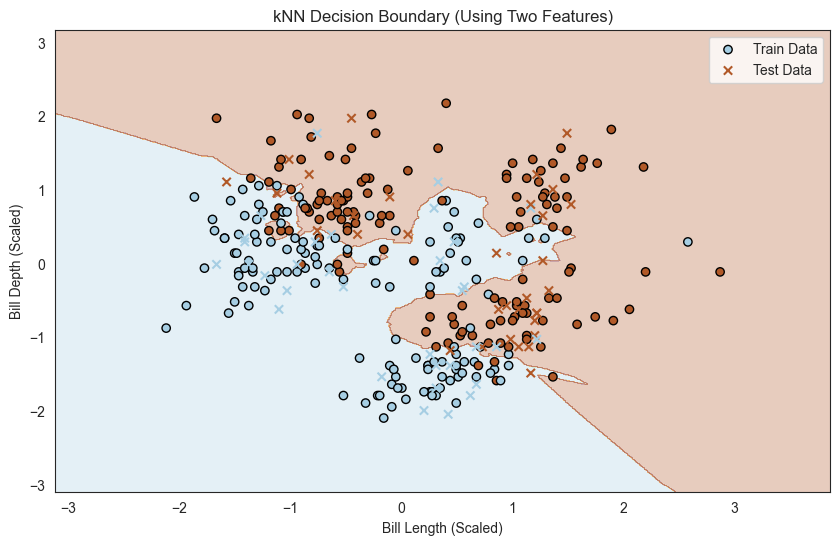

In [21]:
# Define grid boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Create meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Scatter plot of actual data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', cmap=plt.cm.Paired, label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', edgecolor='k', cmap=plt.cm.Paired, label='Test Data')

# Labels and Title
plt.xlabel("Bill Length (Scaled)")
plt.ylabel("Bill Depth (Scaled)")
plt.title("kNN Decision Boundary (Using Two Features)")
plt.legend()
plt.show()

#### Principal Component Analysis 

(333, 2)


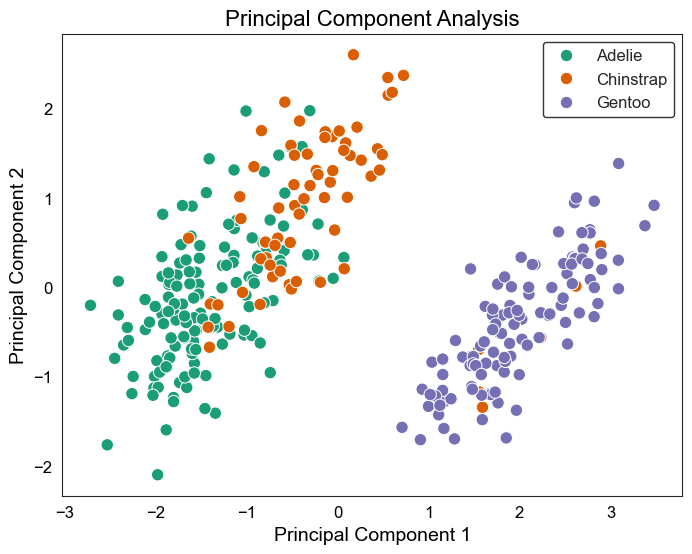

In [22]:
### Use Pca to visualizie features
from sklearn.decomposition import PCA

# Load the data
X_features = penguine_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', "body_mass_g"]]  # Features

# Standardize the data
sclaer = StandardScaler()
X_features = scaler.fit_transform(X_features)

# Create a PCA model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

print(X_pca.shape)
#X_pca["species"] = penguine_clean["species"]
X_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
X_pca["species"] = penguine_clean["species"]

#print(X_pca.head())

# Plot the results
plt.figure(figsize=(8, 6))
sns.set_style("white")

#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_response, cmap='viridis', s=50, alpha=0.8)
sns.scatterplot(data=X_pca, x="PC1", y="PC2",hue="species", palette="Dark2", s=80)
#plt.colorbar()
plt.xlabel("Principal Component 1", fontsize=14, color = 'black')
plt.ylabel("Principal Component 2", fontsize=14, color = 'black')
plt.title("Principal Component Analysis", fontsize=16, color = 'black')

plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.legend(edgecolor = 'black', frameon=True, fontsize=12)
plt.show()

#### Support Vector Machine

In [23]:
# impor libraries for support vector machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
X_features = penguine_clean[['bill_length_mm', 'bill_depth_mm']]  # Features
y_response = penguine_clean["sex"]  # Response

# Encode the response variable
le = LabelEncoder()
y_response = le.fit_transform(y_response)

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_response, test_size=0.2, random_state=42, stratify=y_response)

# Standardize the data  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a SVM model
svm = make_pipeline(StandardScaler(), SVC(kernel="linear", C=1.0, random_state=42, gamma="auto"))
#svm = SVC(kernel="linear", C=1.0, random_state=42, gamma="auto")
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7761194029850746


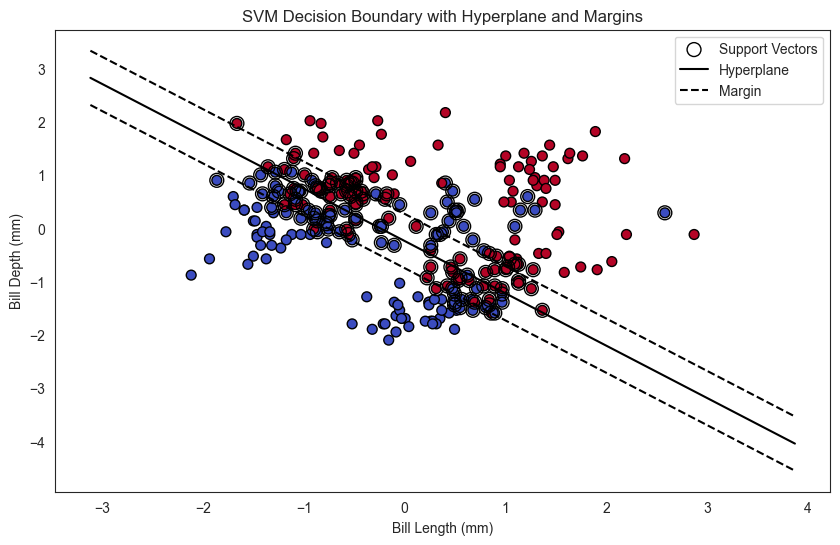

In [24]:
import numpy as np

# Convert DataFrame to NumPy array
X_train = np.array(X_train)
X_test = np.array(X_test)

# Extract the coefficients and intercept for the hyperplane
svc_model = svm.named_steps['svc']  # Access the SVC inside the pipeline
w = svc_model.coef_[0]  # Coefficients
b = svc_model.intercept_[0]  # Intercept

# Define the hyperplane equation: w0 * x0 + w1 * x1 + b = 0
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(w[0] / w[1]) * xx - (b / w[1])  # Hyperplane equation

# Calculate margins
margin = 1 / np.sqrt(np.sum(w ** 2))  # Margin width
yy_plus = yy + margin  # Positive margin
yy_minus = yy - margin  # Negative margin

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=50)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', label='Support Vectors')

# Plot decision boundary and margins
plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.plot(xx, yy_plus, 'k--', label='Margin')
plt.plot(xx, yy_minus, 'k--')
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("SVM Decision Boundary with Hyperplane and Margins")
plt.legend()
plt.show()


#### Decision Tree & Random Forest

In [28]:
# impoer libraries for decision tree
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import and transform the data
# Load the data
# X_features = penguine_clean[['bill_length_mm', 'bill_depth_mm']]  # Features
# y_response = penguine_clean["sex"]  # Response

X_features = penguine_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_response = penguine_clean['species']

# Encode the response variable
le = LabelEncoder()
y_response = le.fit_transform(y_response)

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_response, test_size=0.2, random_state=42, stratify=y_response)

# Standardize the data  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Decision Tree Accuracy: 0.9552238805970149

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.88      1.00      0.93        14
           2       1.00      0.92      0.96        24

    accuracy                           0.96        67
   macro avg       0.95      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



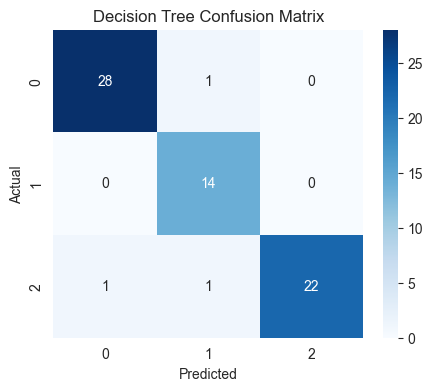

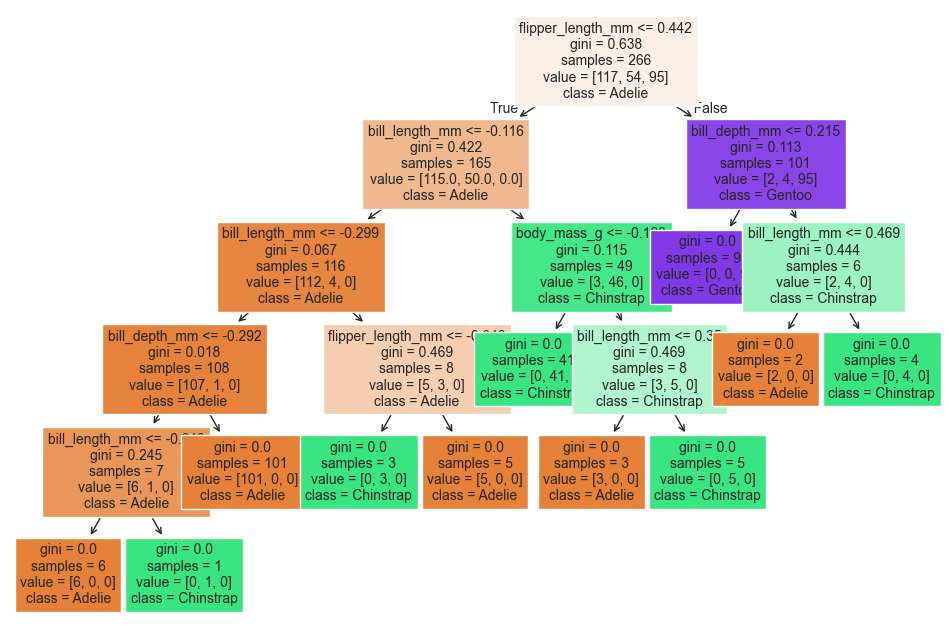

In [35]:
# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap="Blues", fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X_features.columns, class_names=le.classes_, filled=True, fontsize=10)
plt.show()


#### Random Forest

Random Forest Accuracy: 0.9701492537313433

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.88      1.00      0.93        14
           2       1.00      0.96      0.98        24

    accuracy                           0.97        67
   macro avg       0.96      0.97      0.96        67
weighted avg       0.97      0.97      0.97        67



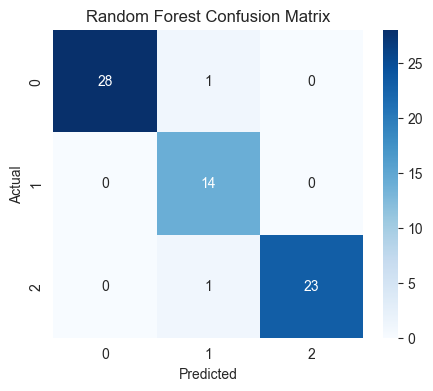

In [36]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_16196\3160980034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


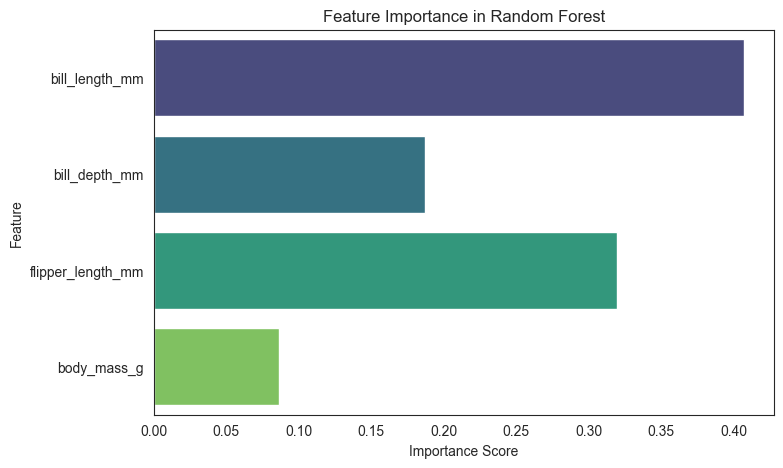

In [38]:
# Get feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X_features.columns

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()


#### Random Forest with columns dropped

In [46]:
# improt libraries for random forest
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
X_features = penguine_clean[['bill_length_mm', 'flipper_length_mm']]
y_response = penguine_clean['species']

# Encode the response variable
enchoder = LabelEncoder()
y_response = enchoder.fit_transform(y_response)

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_response, test_size=0.2, random_state=42, stratify=y_response)

# Standardize the data  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [56]:
print(penguine_clean.species.unique())

['Adelie' 'Chinstrap' 'Gentoo']


Random Forest Accuracy: 0.9701492537313433

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.88      1.00      0.93        14
           2       1.00      0.96      0.98        24

    accuracy                           0.97        67
   macro avg       0.96      0.97      0.96        67
weighted avg       0.97      0.97      0.97        67



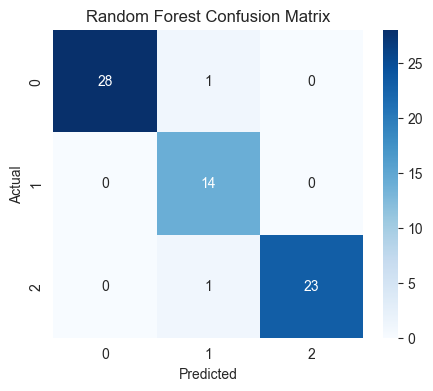

In [ ]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=300, 
                                  max_depth=10, 
                                  bootstrap=True,
                                  max_features='log2',
                                  min_samples_split=4,
                                  random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_16196\3160980034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


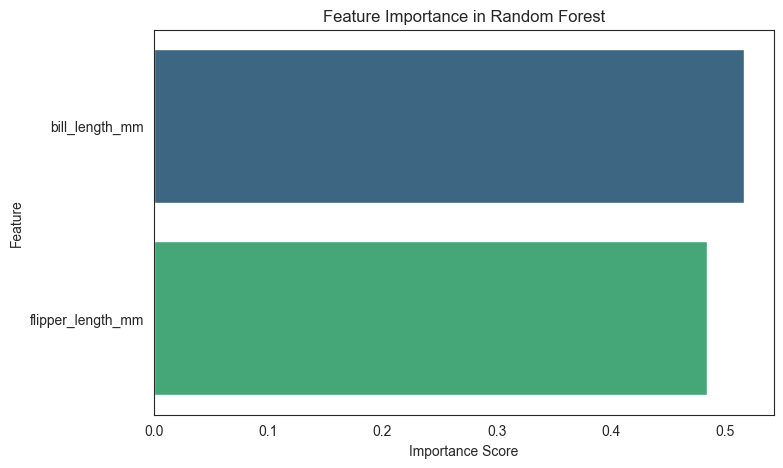

In [54]:
# Get feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X_features.columns

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()


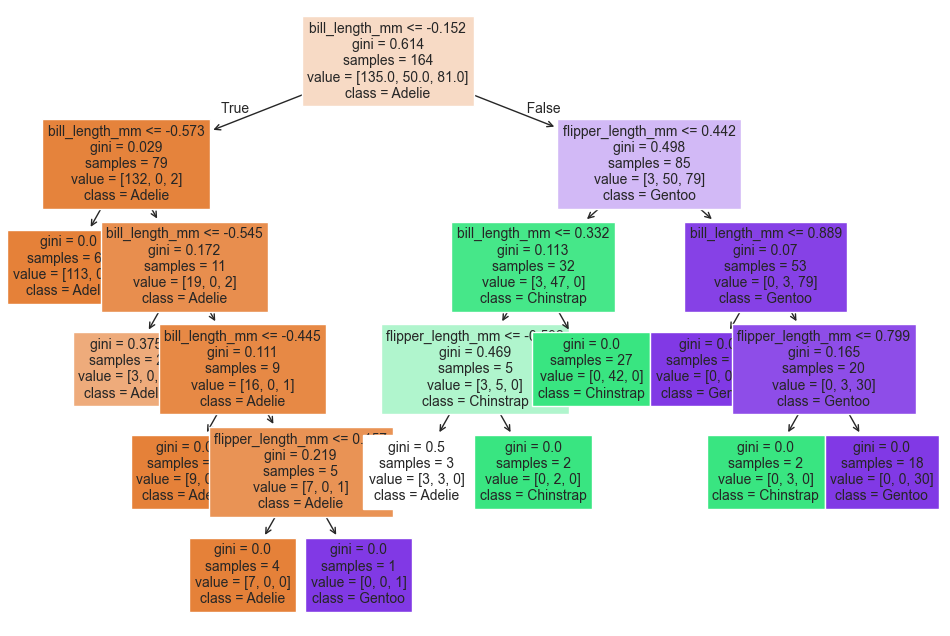

In [55]:
from sklearn.tree import plot_tree

# Extract the first tree from the random forest
single_tree = rf_model.estimators_[1]  # Access the first tree

# Plot the extracted tree
plt.figure(figsize=(12, 8))
plot_tree(single_tree, feature_names=X_features.columns, class_names=enchoder.classes_, filled=True, fontsize=10)
plt.show()


#### Grid Search for Model Optimization


In [57]:
# improt libraries for random forest
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
X_features = penguine_clean[['bill_length_mm', 'flipper_length_mm']]
y_response = penguine_clean['species']

# Encode the response variable
enchoder = LabelEncoder()
y_response = enchoder.fit_transform(y_response)

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_response, test_size=0.2, random_state=42, stratify=y_response)

# Standardize the data  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15, None],   # Tree depth (None = full depth)
    'max_features': ['sqrt', 'log2'],  # Feature selection per split
    'min_samples_split': [2, 4, 8],    # Minimum samples per split
    'min_samples_leaf': [1, 2, 4],     # Minimum samples per leaf
    'bootstrap': [True, False],        # Whether to bootstrap samples
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)  # Uses all CPUs

# Use RandomizedSearchCV for efficient tuning
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, 
                                   n_iter=20, cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit model on training data
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)

# Train the optimized model with best parameters
best_rf = random_search.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': True}
Optimized Random Forest Accuracy: 0.9701492537313433


Random Forest Accuracy: 0.9701492537313433

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.88      1.00      0.93        14
           2       1.00      0.96      0.98        24

    accuracy                           0.97        67
   macro avg       0.96      0.97      0.96        67
weighted avg       0.97      0.97      0.97        67



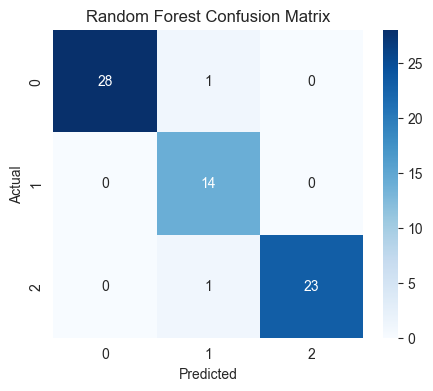

In [59]:
# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Regression with Random Forest

In [63]:
# import data
df = pd.read_csv("salary_data.csv")

# print and check for NAN data
print(df.dtypes)
#print(df.isna())
print(df.info())


Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None


In [64]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [76]:
# drop null data
df = df.dropna(subset=["Salary"])

In [78]:
# Random Forest Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

# Handle the data
salary = pd.read_csv("salary_data.csv")
salary = salary.dropna(subset=["Salary"])

#salary.head()
salary.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6699 non-null   float64
 1   Gender               6699 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6699 non-null   object 
 4   Years of Experience  6699 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.4+ KB


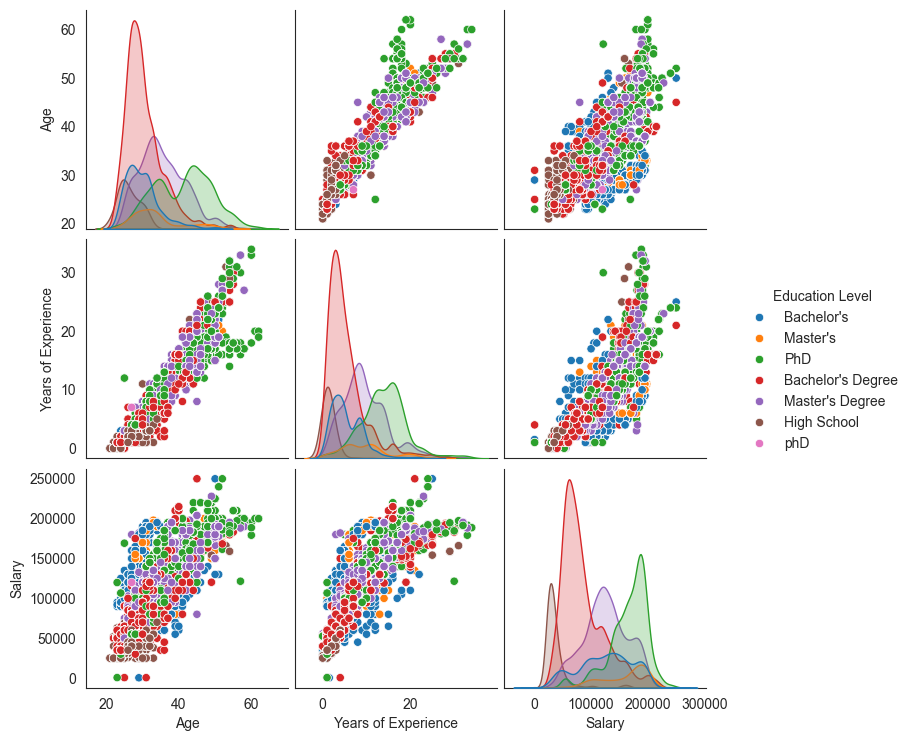

In [83]:
sns.pairplot(data=salary, hue="Education Level", palette="tab10")
plt.show()

In [79]:
# split data into train test and analyze
X_features = salary.drop(columns=['Salary'])
y_response = salary["Salary"]


# one hot enchoder for x data
X_features = pd.get_dummies(X_features, drop_first=True )

X_features = X_features.astype(int)
#X_features = OneHotEncoder(X_features)

X_features.head()

,Age,Years of Experience,Gender_Male,Gender_Other,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,Education Level_phD,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45,15,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,36,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52,20,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# split data into train test 
X_train, X_test, y_train, y_test = train_test_split(X_features, y_response, test_size=0.2, random_state=42)

# Initialize and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [81]:
# make predictions and see results

y_pred = rf_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 2680.8122380603913
Mean Squared Error: 45066625.9160369
R² Score: 0.9841479824145113


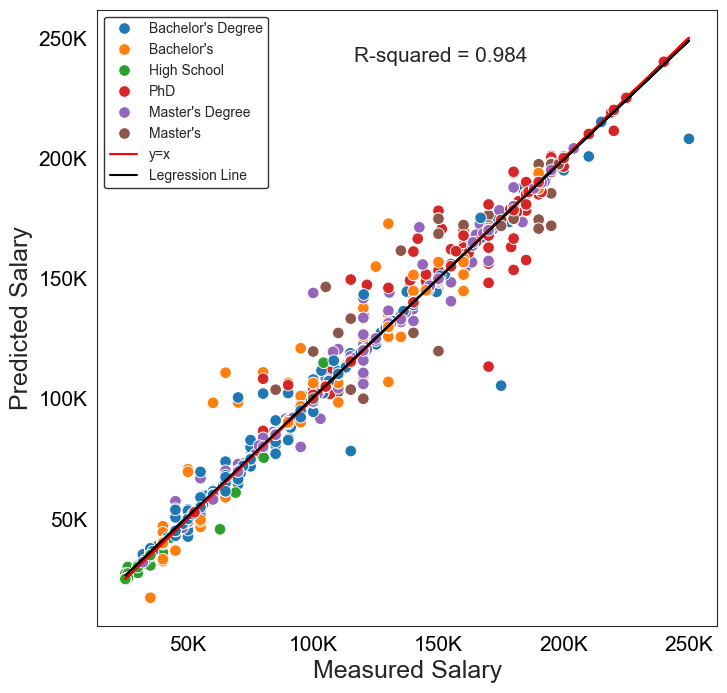

In [109]:
# plot predicted salary vs predicted salary
from scipy.stats import pearsonr
import matplotlib.ticker as ticker

r2 = r2_score(y_test, y_pred)
sa_df =  pd.DataFrame({
    "predicted_salary":y_pred,
    "real_salary":y_test.values,
    "education": salary["Education Level"],
}, index=y_test.index )

m, c = np.polyfit(sa_df["real_salary"],sa_df["predicted_salary"], 1)

plt.figure(figsize=(8,8))
sns.set_style(style="white")


sns.scatterplot(data=sa_df, x = "real_salary", y= "predicted_salary", hue='education', s=70)
plt.plot(sa_df["real_salary"], sa_df["real_salary"], color="red", label='y=x')
plt.plot(sa_df["real_salary"], m*sa_df["real_salary"] + c, color ='black', label="Legression Line")

plt.xlabel("Measured Salary", fontsize=18)
plt.ylabel("Predicted Salary", fontsize=18)

# Adjust x and y axis limits to avoid excessive zeros
# plt.xlim(sa_df["real_salary"].min() * 0.9, sa_df["real_salary"].max() * 1.1)
# plt.ylim(sa_df["predicted_salary"].min() * 0.9, sa_df["predicted_salary"].max() * 1.1)
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e3:.0f}K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/1e3:.0f}K'))

plt.xticks(color='black', fontsize=15)
plt.yticks(color='black', fontsize=15)

plt.text(sa_df["real_salary"].median(), 
         sa_df["predicted_salary"].max(),
         f"R-squared = {r2:.3f}",
         fontsize = 15,
         bbox=dict(facecolor='white', 
                       alpha=0.8)
         )

plt.legend(edgecolor='black')
plt.show()

#### Apply PLS 

In [111]:
# Random Forest Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

# Handle the data
salary = pd.read_csv("salary_data.csv")
salary = salary.dropna(subset=["Salary"])

#salary.head()
salary.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6699 non-null   float64
 1   Gender               6699 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6699 non-null   object 
 4   Years of Experience  6699 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.4+ KB


In [113]:
# split data into train test and analyze
X_features = salary.drop(columns=['Salary'])
y_response = salary["Salary"]

# one hot enchoder for x data
X_features = pd.get_dummies(X_features, drop_first=True )

X_features = X_features.astype(int)
#X_features = OneHotEncoder(X_features)

# print features head
X_features.head()

# split data into train test 
X_train, X_test, y_train, y_test = train_test_split(X_features, y_response, test_size=0.2, random_state=42)

In [116]:
# PLS Regression
pls = PLSRegression(n_components=12)
pls.fit(X_features,y_response)

# Predict y_test
y_pred = pls.predict(X_test)

# print results of analysis
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)


# print results 
print("r-squared", r2)
print("MSE",mse)
print("MAE",mae)

r-squared 0.8875975140256814
MSE 319555587.1748696
MAE 12545.173174550418


In [121]:
# function for x and y plot
def pls_regression(X,y,ncomp):
       
    mse = []
    r2 = []
    
    for i in range (1, ncomp +1):
        pls= PLSRegression(n_components=i)
        pls.fit(X, y)
        
        y_pred=pls.predict(X)   
        mse.append(mean_squared_error(y, y_pred))
        r2.append(r2_score(y,y_pred))
        
    return mse,r2
    

mse, r2 = pls_regression(X_features,y_response,20) 


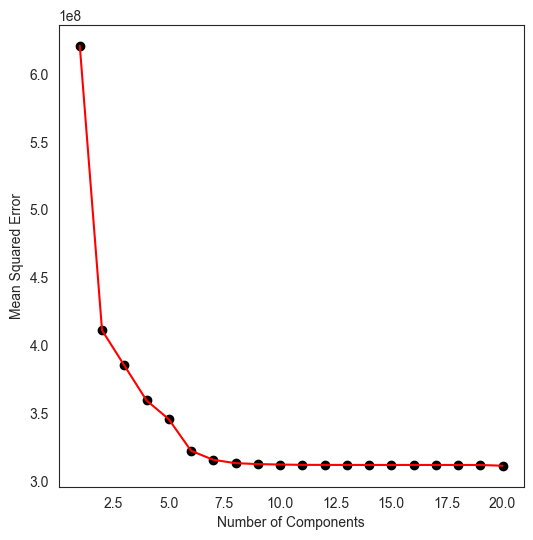

In [ ]:
data = pd.DataFrame({
    "MSE":mse,
    "R2": r2,
    "n_comp": np.arange(1,21)
})

data.head()

plt.figure(figsize=(6,6))
sns.set_style(style='white')

plt.plot(data['n_comp'], data["MSE"], color="red")
plt.scatter(data['n_comp'], data["MSE"], color="black")

plt.xlabel("Number of Components")
plt.ylabel("Mean Squared Error")

plt.show()



In [133]:
print(data["MSE"].min())

310965636.2595355
